Graduate Admissions Dataset:
This dataset is created for prediction of Graduate Admissions for International Students.

The dataset contains several parameters which are considered important during the application for Masters Programs. 
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
Undergraduate University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

In [ ]:
library(ggplot2)
library(scales)
library(randomForest)
library(corrplot)
install.packages("ggrepel")
library(ggrepel)
library(gridExtra)

In [6]:
# IMPORTING DATA
admissions <- read.csv("Admission_Predict.csv", stringsAsFactors = F)

In [7]:
head(admissions)

,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4.0,4.5,8.87,1,0.76
3,3,316,104,3,3.0,3.5,8.00,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.80
5,5,314,103,2,2.0,3.0,8.21,0,0.65
6,6,330,115,5,4.5,3.0,9.34,1,0.90


Exploring the dataset size and structure

In [8]:
dim(admissions)

[1] 400   9

In [9]:
str(admissions)

'data.frame':	400 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 302 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : int  1 1 1 1 0 1 1 0 0 0 ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...


In [10]:
summary(admissions)

   Serial.No.      GRE.Score      TOEFL.Score    University.Rating
 Min.   :  1.0   Min.   :290.0   Min.   : 92.0   Min.   :1.000    
 1st Qu.:100.8   1st Qu.:308.0   1st Qu.:103.0   1st Qu.:2.000    
 Median :200.5   Median :317.0   Median :107.0   Median :3.000    
 Mean   :200.5   Mean   :316.8   Mean   :107.4   Mean   :3.087    
 3rd Qu.:300.2   3rd Qu.:325.0   3rd Qu.:112.0   3rd Qu.:4.000    
 Max.   :400.0   Max.   :340.0   Max.   :120.0   Max.   :5.000    
      SOP           LOR             CGPA          Research     
 Min.   :1.0   Min.   :1.000   Min.   :6.800   Min.   :0.0000  
 1st Qu.:2.5   1st Qu.:3.000   1st Qu.:8.170   1st Qu.:0.0000  
 Median :3.5   Median :3.500   Median :8.610   Median :1.0000  
 Mean   :3.4   Mean   :3.453   Mean   :8.599   Mean   :0.5475  
 3rd Qu.:4.0   3rd Qu.:4.000   3rd Qu.:9.062   3rd Qu.:1.0000  
 Max.   :5.0   Max.   :5.000   Max.   :9.920   Max.   :1.0000  
 Chance.of.Admit 
 Min.   :0.3400  
 1st Qu.:0.6400  
 Median :0.7300  
 Mean   :0.

CLEANING THE DATASET

Identifying if there are any missing values

In [11]:
colSums(is.na(admissions))

Serial.No.         GRE.Score       TOEFL.Score University.Rating 
                0                 0                 0                 0 
              SOP               LOR              CGPA          Research 
                0                 0                 0                 0 
  Chance.of.Admit 
                0

This means there are no missing value.

Converting the Research column in the admissions data frame from a numeric type to a factor type, to handle categorical data.

In [12]:
admissions$Research<-as.factor(admissions$Research)

DATA VISUALIZATION

Target Variable
Chance of Admit is the variable we need to predict. So let's do some analysis on this variable first.

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘magrittr’, ‘pkgconfig’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘withr’





The downloaded binary packages are in
	/var/folders/qf/3_sk7yj9547c0khrkg63hjlr0000gn/T//RtmpaYlYyC/downloaded_packages


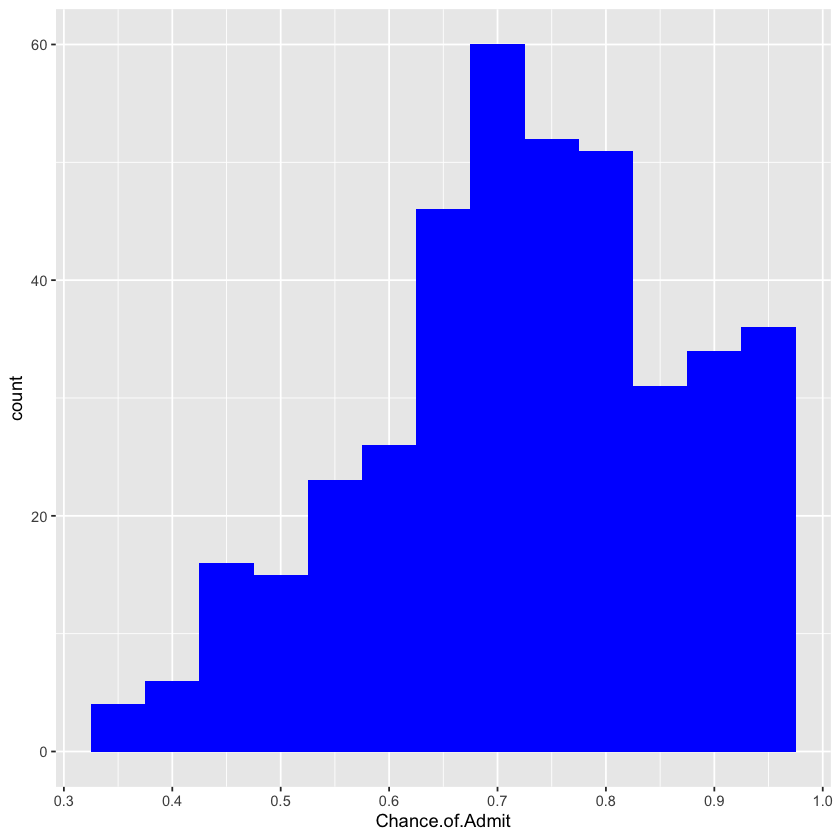

In [14]:
 ggplot(data = admissions, aes(x = Chance.of.Admit)) +
  geom_histogram(binwidth = 0.05, fill = "blue") + 
  scale_x_continuous(breaks = seq(0, 1, by = 0.1), labels = comma)

In [15]:
summary(admissions$Chance.of.Admit)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3400  0.6400  0.7300  0.7244  0.8300  0.9700 

Now let's understand the meaning and the distribution of the features and study the relationships between features.

Building a random forest model for understanding feature(variables or predictors) importance in predicting target variable.
Calculating variable importance, and visualizing the top important variables using ggplot2 in R.

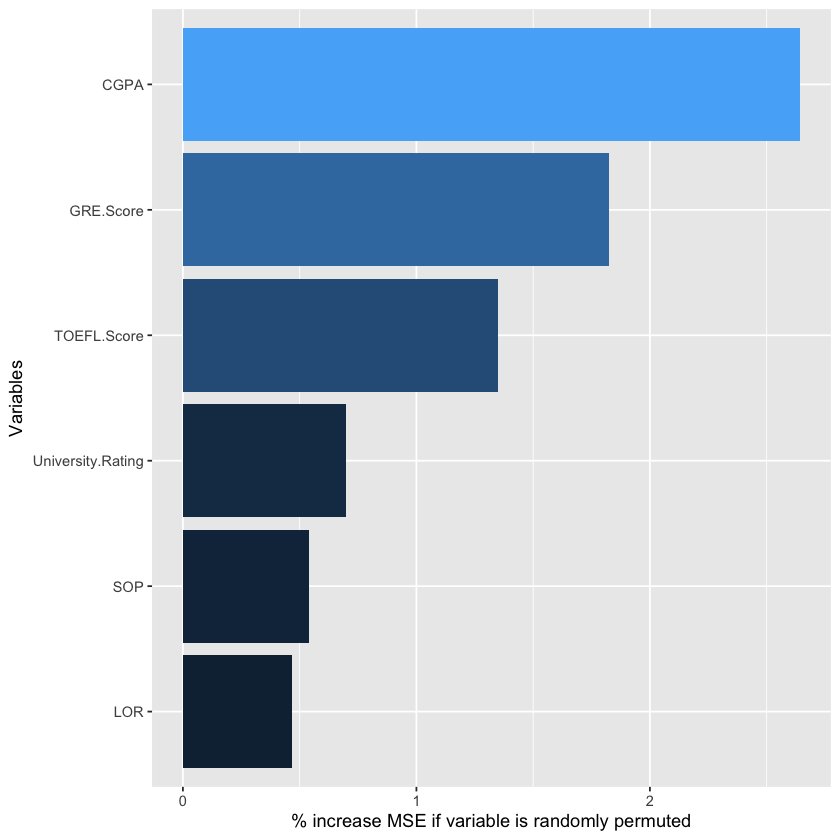

In [72]:
set.seed(222)
rdf <- randomForest(admissions$Chance.of.Admit ~ ., data = admissions[,2:9], na.action = na.roughfix)
imp_RF <- importance(rdf)
imp_DF <- data.frame(Variables = row.names(imp_RF), MSE = imp_RF[,1])
imp_DF <- imp_DF[order(imp_DF$MSE, decreasing = TRUE),]
ggplot(imp_DF[1:6,], aes(x = reorder(Variables, MSE), y = MSE, fill = MSE)) +
  geom_bar(stat = 'identity') +
  labs(x = 'Variables', y = '% increase MSE if variable is randomly permuted') +
  coord_flip() +
  theme(legend.position = "none")

This shows the variables by their importance in descending order of MSE, the most important variable appearing at the top of the plot.

In [73]:
numericVars <- which(sapply(admissions[,2:9], is.numeric)) 
numericVarNames <- names(numericVars) 
cat('There are', length(numericVars), 'numeric variables')

There are 7 numeric variables

Data Correlation

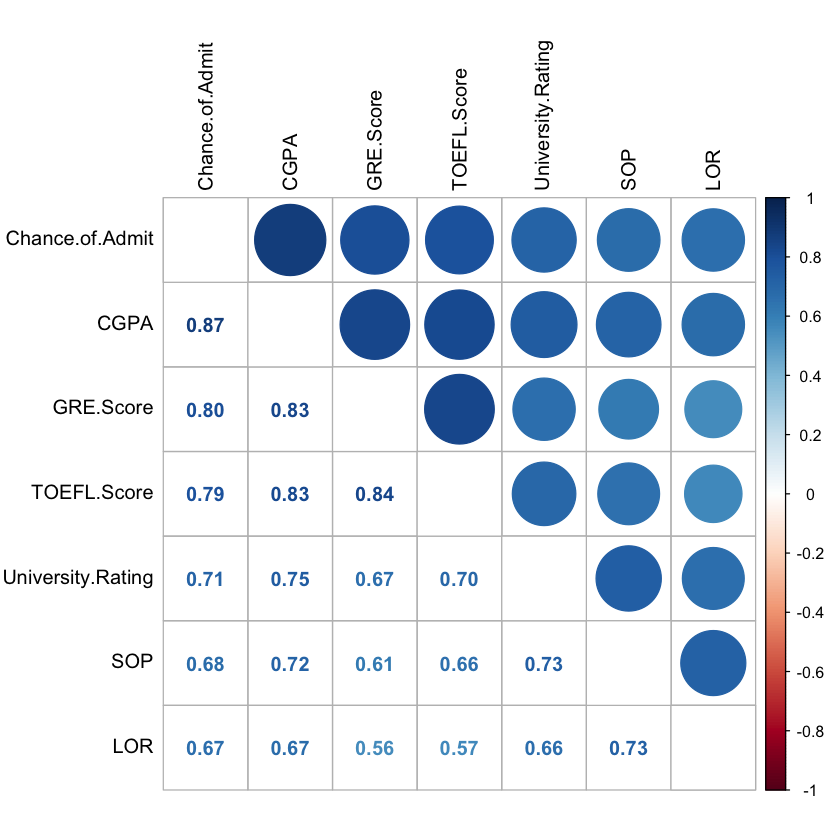

In [74]:
#Correlation map to see how features are correlated
admissions_numVar <- admissions[,2:9][, numericVars]
cor_numVar <- cor(admissions_numVar, use = "pairwise.complete.obs") #calculating pairwise correlations
cor_sorted <- as.matrix(sort(cor_numVar[, 'Chance.of.Admit'], decreasing = TRUE)) #sorting correlations by Chance.of.Admit
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x) > 0)))
cor_numVar <- cor_numVar[CorHigh, CorHigh]
corrplot.mixed(cor_numVar, tl.col = "black", tl.pos = "lt")

Plotting to understand the relationship between CGPA and Chance.of.Admit


The downloaded binary packages are in
	/var/folders/qf/3_sk7yj9547c0khrkg63hjlr0000gn/T//RtmpaYlYyC/downloaded_packages


`geom_smooth()` using formula = 'y ~ x'


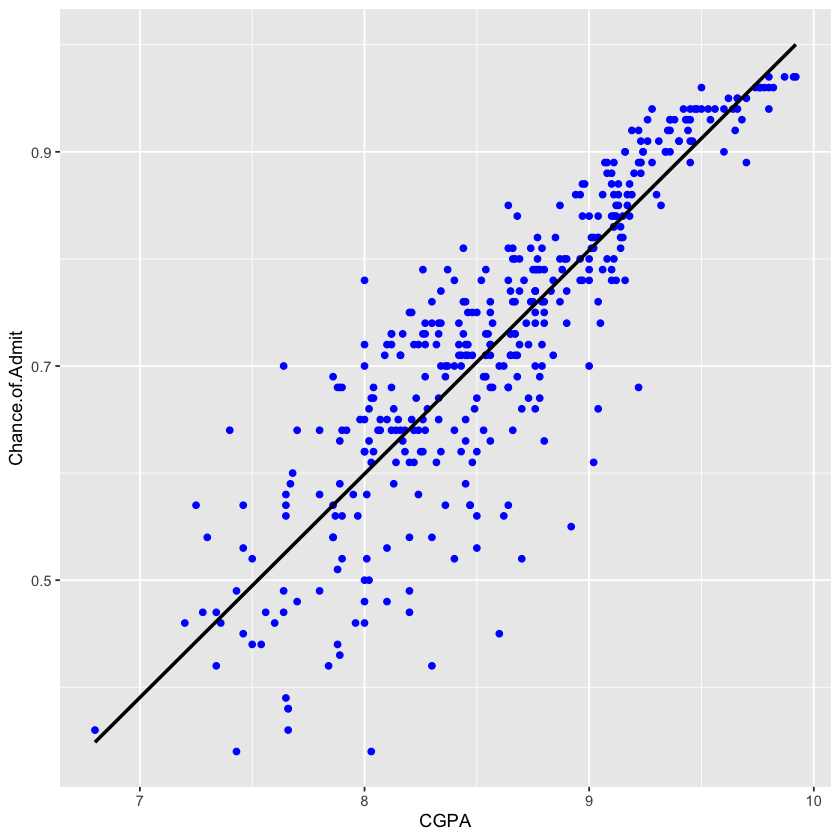

In [63]:
ggplot(admissions, aes(x=CGPA, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) 

We observe a linear dependency between these variables.
A linear dependency between variables suggests that linear regression models might be appropriate for prediction.

Now let's understand the relationship between the remaining numerical features and Chance.of.Admit

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


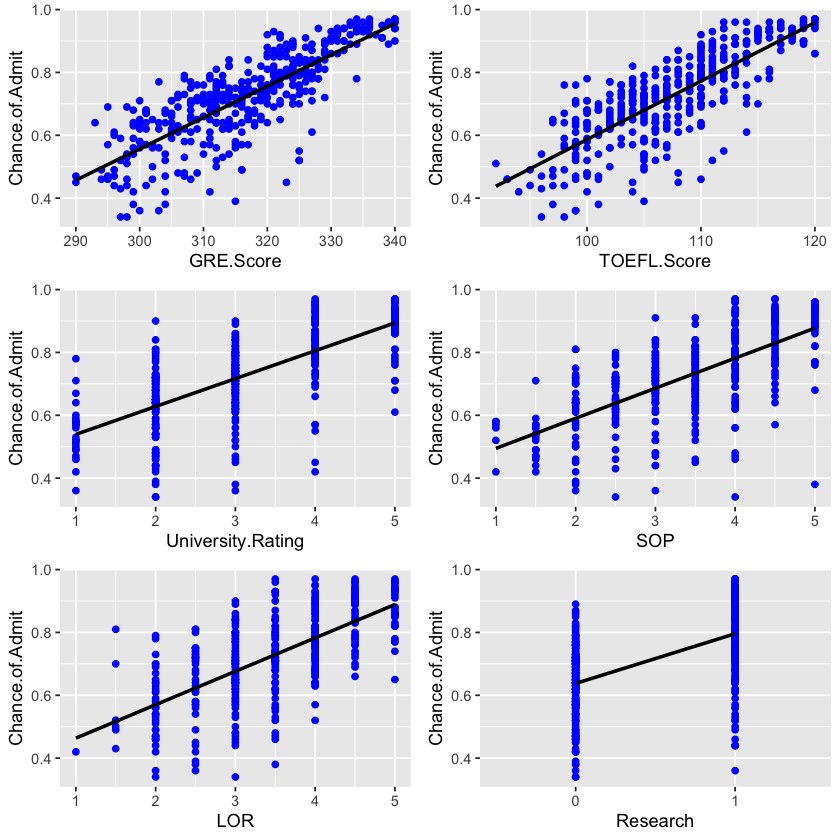

In [75]:
p1<-ggplot(admissions, aes(x=GRE.Score, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) 
p2<-ggplot(admissions, aes(x=TOEFL.Score, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) 
p3<-ggplot(admissions, aes(x=University.Rating, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) 
p4<-ggplot(admissions, aes(x=SOP, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1))
p5<-ggplot(admissions, aes(x=LOR, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) 
p6<-ggplot(admissions, aes(x=Research, y=Chance.of.Admit))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) 
grid.arrange(p1,p2,p3,p4,p5,p6)

GETTING THE TRAIN AND TEST DATASETS

Randomly spliting the dataset admissions into two parts: 70% for training and 30% for testing. 
This is essential to ensure that the model can be trained on one subset of data and tested (validated) on another subset to evaluate its performance.

In [64]:
index <- sample(2,nrow(admissions),replace= TRUE,prob=c(0.7,0.3))
train_data <- admissions[index==1,]
test_data <- admissions[index==2,]
train_data<-train_data[,2:9]
test_data<-test_data[,2:9]

In [65]:
dim(train_data)

[1] 287   8

In [66]:
dim(test_data)

[1] 113   8

MODELING

Linear Regression

In [ ]:
Training the model

In [68]:
model <- lm(train_data$Chance.of.Admit~., data =train_data)
summary(model)


Call:
lm(formula = train_data$Chance.of.Admit ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26112 -0.02377  0.01097  0.03485  0.16107 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2188197  0.1446519  -8.426 1.92e-15 ***
GRE.Score          0.0016190  0.0006782   2.387 0.017648 *  
TOEFL.Score        0.0030568  0.0012779   2.392 0.017419 *  
University.Rating  0.0020478  0.0054107   0.378 0.705365    
SOP               -0.0016552  0.0065657  -0.252 0.801150    
LOR                0.0251408  0.0063947   3.931 0.000107 ***
CGPA               0.1164071  0.0144423   8.060 2.25e-14 ***
Research1          0.0298911  0.0093418   3.200 0.001534 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06242 on 279 degrees of freedom
Multiple R-squared:  0.8081,	Adjusted R-squared:  0.8033 
F-statistic: 167.8 on 7 and 279 DF,  p-value: < 2.2e-16


Statistics of the Residuals (differences between observed and predicted values).
Min: Minimum residual value.
1Q: First quartile (25th percentile) of residuals.
Median: Median (50th percentile) of residuals.
3Q: Third quartile (75th percentile) of residuals.
Max: Maximum residual value.
Small residuals (close to zero) indicate a good fit.

The estimated effect of each predictor on Chance.of.Admit.
Coefficients: These tell us how much the admission chance changes with each unit change in the factor, while keeping other factors constant. For example, a slight increase in GRE scores or TOEFL scores increases admission chances a bit, but a good GPA or having research experience makes a much bigger difference.
Significance (p-values): Numbers (p-values) next to the predictors tell us how reliable these effects are. For instance, a low p-value (less than 0.05) means we can be confident that the predictor really does have an effect. 
Significant predictors in our model include GRE score, TOEFL score, LOR, GPA, and research experience.

Based on our model, if a student wants to improve their chances of getting into a graduate program, they should focus on getting a good GPA, gaining research experience, and obtaining strong letters of recommendation. 
Higher GRE and TOEFL scores also help but to a lesser extent. 
The rating of their undergraduate university and the quality of their statement of purpose are less important according to this model.

Testing the model

Root Mean Squared Error (RMSE): 0.06761906 


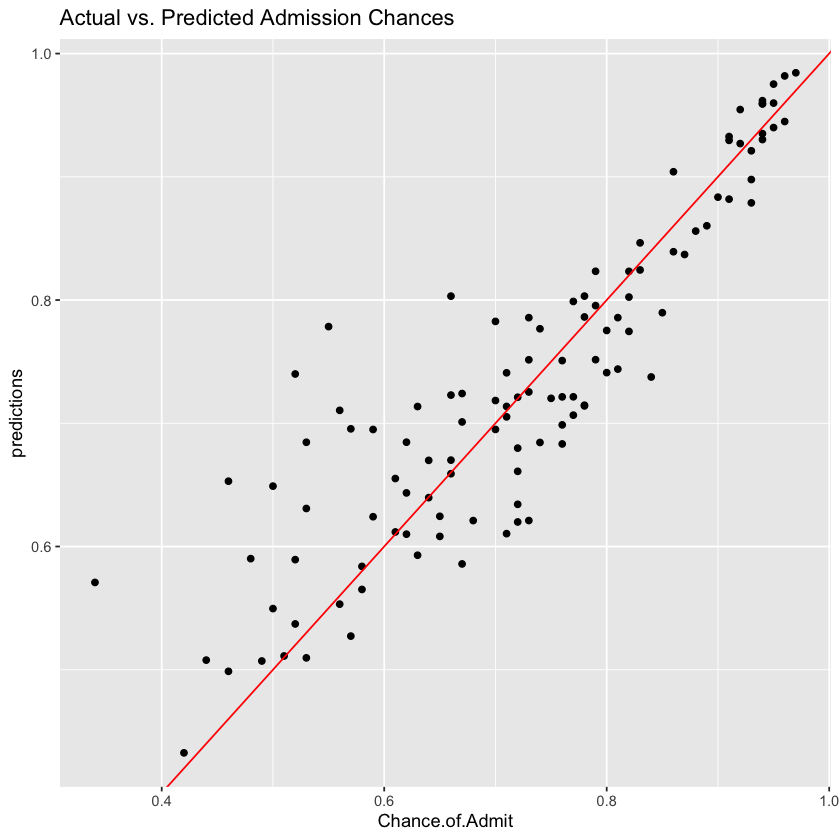

In [71]:
# Predicting on the test data
predictions <- predict(model, test_data)

# Calculating performance metrics
rmse <- sqrt(mean((predictions - test_data$Chance.of.Admit)^2))
cat("Root Mean Squared Error (RMSE):", rmse, "\n")

# Ploting actual vs predicted values
ggplot(test_data, aes(x = Chance.of.Admit, y = predictions)) + 
  geom_point() + 
  geom_abline(intercept = 0, slope = 1, color = "red") + 
  ggtitle("Actual vs. Predicted Admission Chances")
